In [3]:
#Import Necessary Libraries

In [4]:
import torch  # Importing PyTorch library
import torchvision  # Importing torchvision library for handling image data
import torchvision.transforms as transforms  # Importing transforms from torchvision to transform images
import matplotlib.pyplot as plt  # Importing matplotlib for plotting images
import numpy as np  # Importing NumPy for handling arrays

In [5]:
#Define a Function to show an image

In [6]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()  # Convert image to NumPy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose and display the image
    plt.show()  # Show the image



In [7]:
# Define the Transformations

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),  # Convert image to tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Normalize image

In [9]:
#Set Batch Size

In [10]:
batch_size = 4  # Number of images per batch

In [11]:
# Load and normalize the CIFAR-10 Dataset

In [12]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,  # Load CIFAR-10 training set
                                        download=True, transform=transform)  # Apply transformations
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,  # Create data loader for training set
                                          shuffle=True, num_workers=2)  # Shuffle data and use 2 worker threads

testset = torchvision.datasets.CIFAR10(root='./data', train=False,  # Load CIFAR-10 test set
                                       download=True, transform=transform)  # Apply transformations
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,  # Create data loader for test set
                                         shuffle=False, num_workers=2)  # Do not shuffle data and use 2 worker threads

100%|██████████| 170498071/170498071 [00:03<00:00, 43317836.92it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [13]:
#Define Class Names

In [14]:
classes = ('plane', 'car', 'bird', 'cat',  # Class names in CIFAR-10 dataset
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [15]:
#Get Some Random Training Images

In [16]:
dataiter = iter(trainloader)  # Create an iterator for the training data loader
images, labels = next(dataiter)  # Get the next batch of images and labels

In [17]:
#Show Images

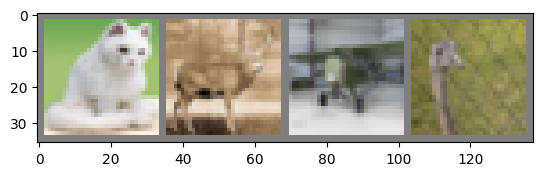

cat   deer  plane bird 


In [18]:
imshow(torchvision.utils.make_grid(images))  # Display a grid of images
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))  # Print the labels of the images

In [19]:
#Define  a Convolutional Neural Network

In [20]:
import torch.nn as nn  # Importing neural network module from PyTorch
import torch.nn.functional as F  # Importing functional module from PyTorch

class Net(nn.Module):  # Defining the neural network class
    def __init__(self):  # Initializing the network
        super().__init__()  # Calling the parent class's initializer
        self.conv1 = nn.Conv2d(3, 6, 5)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(6, 16, 5)  # Second convolutional layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # First fully connected layer
        self.fc2 = nn.Linear(120, 84)  # Second fully connected layer
        self.fc3 = nn.Linear(84, 10)  # Third fully connected layer

    def forward(self, x):  # Defining the forward pass
        x = self.pool(F.relu(self.conv1(x)))  # Apply first conv layer, ReLU, and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Apply second conv layer, ReLU, and pooling
        x = torch.flatten(x, 1)  # Flatten the tensor
        x = F.relu(self.fc1(x))  # Apply first fully connected layer and ReLU
        x = F.relu(self.fc2(x))  # Apply second fully connected layer and ReLU
        x = self.fc3(x)  # Apply third fully connected layer
        return x  # Return the output

net = Net()  # Create an instance of the network

In [21]:
#Define a Loss Function and Optimizer

In [22]:
import torch.optim as optim # # Importing optimization module from PyTorch

criterion = nn.CrossEntropyLoss() #defines the loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) #learning rate and momentum applied


In [23]:
#Train the network

In [24]:
for epoch in range(2):  # Loop over the dataset multiple times

    running_loss = 0.0  # Initialize running loss
    for i, data in enumerate(trainloader, 0):  # Loop through the training data
        inputs, labels = data  # Get the inputs and labels from the data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()  # Update running loss
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')  # Print loss
            running_loss = 0.0  # Reset running loss

print('Finished Training')  # Print when training is done

[1,  2000] loss: 2.175
[1,  4000] loss: 1.845
[1,  6000] loss: 1.688
[1,  8000] loss: 1.589
[1, 10000] loss: 1.534
[1, 12000] loss: 1.501
[2,  2000] loss: 1.436
[2,  4000] loss: 1.430
[2,  6000] loss: 1.396
[2,  8000] loss: 1.344
[2, 10000] loss: 1.377
[2, 12000] loss: 1.343
Finished Training


In [25]:
#Save the trained model

In [26]:
PATH = './cifar_net.pth' #defines the path to save the model
torch.save(net.state_dict(), PATH) #save the model's state to the specified path

In [27]:
#Test the Network on the Test Data

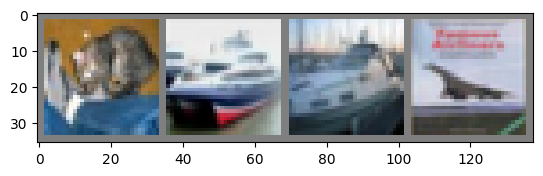

GroundTruth:  cat   ship  ship  plane


<All keys matched successfully>

In [28]:
dataiter = iter(testloader)  # Create an iterator for the test data loader
images, labels = next(dataiter)  # Get the next batch of test images and labels

imshow(torchvision.utils.make_grid(images))  # Display the test images
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))  # Print the actual labels

net = Net()  # Recreate the network
net.load_state_dict(torch.load(PATH))  # Load the saved model's state

In [29]:
#Get Predictions

In [30]:
outputs = net(images)  # Get predictions for the test images
_, predicted = torch.max(outputs, 1)  # Get the predicted class

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))  # Print the predicted labels

Predicted:  cat   car   car   plane


In [31]:
#Evaluate the Network's Performance on the Entire Dataset

In [32]:
correct = 0  # Initialize correct predictions counter
total = 0  # Initialize total samples counter
with torch.no_grad():  # Disable gradient calculation
    for data in testloader:  # Loop through the test data
        images, labels = data  # Get the test images and labels
        outputs = net(images)  # Get predictions
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
        total += labels.size(0)  # Increment total samples counter
        correct += (predicted == labels).sum().item()  # Increment correct predictions counter

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')  # Print accuracy

Accuracy of the network on the 10000 test images: 51 %


In [33]:
#Evaluate Performance for Each Class

In [34]:
correct_pred = {classname: 0 for classname in classes}  # Initialize correct predictions counter for each class
total_pred = {classname: 0 for classname in classes}  # Initialize total samples counter for each class

with torch.no_grad():  # Disable gradient calculation
    for data in testloader:  # Loop through the test data
        images, labels = data  # Get the test images and labels
        outputs = net(images)  # Get predictions
        _, predictions = torch.max(outputs, 1)  # Get the predicted class
        for label, prediction in zip(labels, predictions):  # Loop through the labels and predictions
            if label == prediction:  # If the prediction is correct
                correct_pred[classes[label]] += 1  # Increment correct predictions counter for the class
            total_pred[classes[label]] += 1  # Increment total samples counter for the class

for classname, correct_count in correct_pred.items():  # Loop through the classes
    accuracy = 100 * float(correct_count) / total_pred[classname]  # Compute the accuracy for the class
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')  # Print the accuracy for the class


Accuracy for class: plane is 64.0 %
Accuracy for class: car   is 60.5 %
Accuracy for class: bird  is 16.9 %
Accuracy for class: cat   is 29.7 %
Accuracy for class: deer  is 76.4 %
Accuracy for class: dog   is 28.3 %
Accuracy for class: frog  is 49.8 %
Accuracy for class: horse is 62.9 %
Accuracy for class: ship  is 58.4 %
Accuracy for class: truck is 68.5 %


In [35]:
# Check if GPU is available and move the model to GPU

In [36]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  # Check if GPU is available
print(device)  # Print the device being used (CPU or GPU)
net.to(device)  # Move the network to the GPU if available

# Ensure inputs and labels are also moved to GPU
inputs, labels = data[0].to(device), data[1].to(device)  # Move inputs and labels to GPU if available

cpu
